## BÀI TẬP

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [11]:
n, p = 10, 0.25

st.binom.rvs(n,p,size=10)

array([4, 1, 2, 2, 1, 2, 3, 1, 1, 1], dtype=int64)

In [13]:
st.binom.pmf(4,n,p)

0.14599800109863273

In [14]:
ex = 0
for x in range(0,11):
    fx = st.binom.pmf(x,n,p)
    print(f'x = {x}, f({x}) = {fx}')

    ex += x*fx

print(f'\nKỳ vọng: {ex}')

x = 0, f(0) = 0.05631351470947268
x = 1, f(1) = 0.1877117156982422
x = 2, f(2) = 0.28156757354736334
x = 3, f(3) = 0.2502822875976561
x = 4, f(4) = 0.14599800109863273
x = 5, f(5) = 0.058399200439453146
x = 6, f(6) = 0.0162220001220703
x = 7, f(7) = 0.0030899047851562487
x = 8, f(8) = 0.0003862380981445314
x = 9, f(9) = 2.8610229492187466e-05
x = 10, f(10) = 9.5367431640625e-07

Kỳ vọng: 2.499999999999999


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [12]:
ld = 3
st.poisson.pmf(2,ld)

0.14599800109863273

**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [16]:
mu, sigma = 500, 4

st.norm.rvs(mu, sigma, size=10)

array([494.41723727, 500.50449677, 501.78565828, 497.63019704,
       497.7510051 , 498.99461488, 504.53621811, 500.24295142,
       504.31586888, 504.73988944])

In [21]:

p_type1 = 1 - norm.cdf(505, mu, sigma)

print("Tỷ lệ của loại 1:", p_type1)

p_type2 = norm.cdf(505, mu, sigma) - norm.cdf(495, mu, sigma)

print("Tỷ lệ của loại 2:", p_type2)

p_type3 = norm.cdf(495, mu, sigma)

print("Tỷ lệ của loại 3:", p_type3)

Tỷ lệ của loại 1: 0.10564977366685535
Tỷ lệ của loại 2: 0.7887004526662893
Tỷ lệ của loại 3: 0.10564977366685535


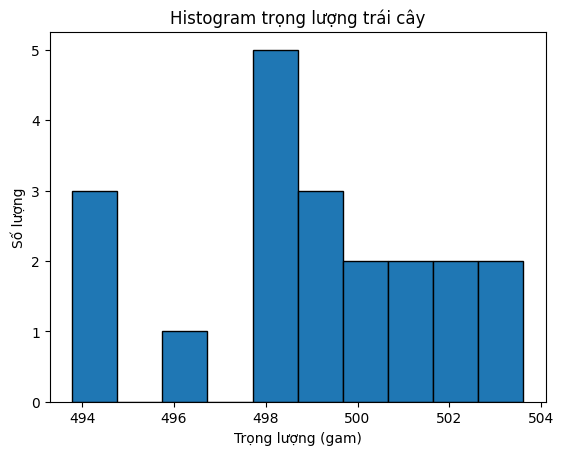

In [22]:
# Mô phỏng lấy mẫu 20 trái cây
sample = np.random.normal(mu, sigma, 20)

# Vẽ histogram
plt.hist(sample, bins=10, edgecolor='black')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Số lượng')
plt.title('Histogram trọng lượng trái cây')
plt.show()

In [23]:
# Tính giá trị trung bình và độ lệch chuẩn từ mẫu
mean = np.mean(sample)
std = np.std(sample)

# In giá trị trung bình và độ lệch chuẩn
print("Giá trị trung bình:", mean)
print("Độ lệch chuẩn:", std)

Giá trị trung bình: 499.07809217989245
Độ lệch chuẩn: 2.7992715871812694


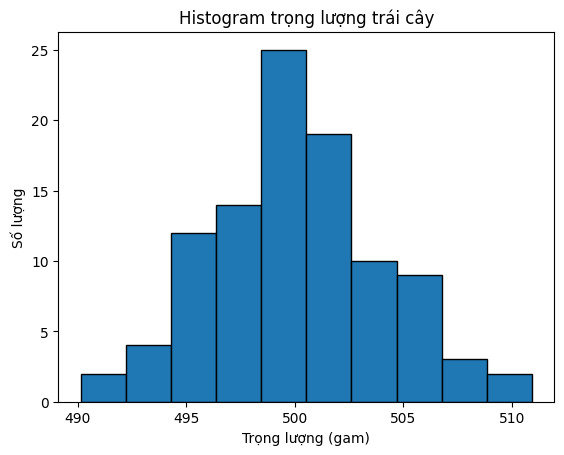

In [24]:
# Mô phỏng lấy mẫu 100 trái cây
sample = np.random.normal(mu, sigma, 100)

# Vẽ histogram
plt.hist(sample, bins=10, edgecolor='black')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Số lượng')
plt.title('Histogram trọng lượng trái cây')
plt.show()

In [25]:
# Tính giá trị trung bình và độ lệch chuẩn từ mẫu
mean = np.mean(sample)
std = np.std(sample)

# In giá trị trung bình và độ lệch chuẩn
print("Giá trị trung bình:", mean)
print("Độ lệch chuẩn:", std)

Giá trị trung bình: 499.99391741661935
Độ lệch chuẩn: 3.9069578481073184


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [29]:
n = 5000  
# số lần thử nghiệm
p = 1/6  
# xác suất thành công trong mỗi lần thử

binomial_dist = binom(n, p)
probability = binomial_dist.pmf(4)

print(probability)

0.0


In [30]:
binomial_dist = binom(n, p)
probability = 1 - binomial_dist.cdf(3)

print(probability)

1.0


In [34]:
n = 4  
# Số lần tung
p = 1/6  
# Xác suất thành công (mặt 6 chấm xuất hiện)

k = 4  
# Số chấm xuất hiện (mặt 6)

# Tính xác suất sử dụng PMF của phân phối nhị thức
probability = binom.pmf(k, n, p)

# Chuyển đổi kết quả thành phân số
numerator = int(probability * 10000)
denominator = 10000

print("Xác suất để mặt 6 chấm xuất hiện trong số chấm xuất hiện lớn hơn hoặc bằng 4 là:", numerator, "/", denominator)

Xác suất để mặt 6 chấm xuất hiện trong số chấm xuất hiện lớn hơn hoặc bằng 4 là: 7 / 10000


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

Min: 23
Max: 44
Q1: 33.0
Q2: 35.0
Q3: 37.0


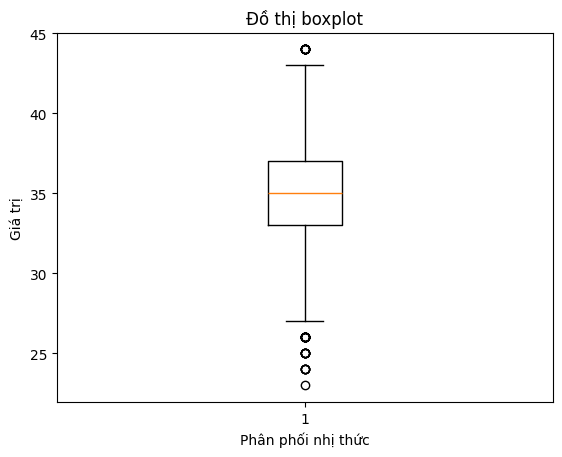

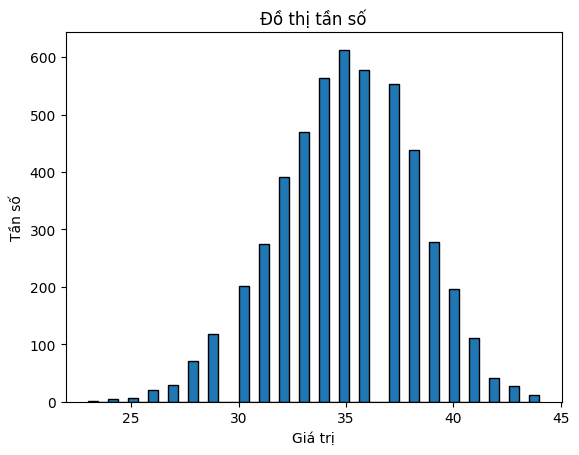

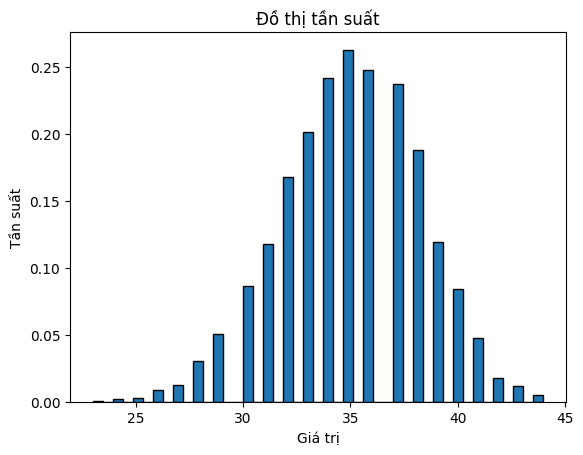

In [35]:
# Tạo 5000 số ngẫu nhiên có phân phối nhị thức
n = 50
p = 0.7
random_numbers = binom.rvs(n, p, size=5000)

# a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3
min_value = np.min(random_numbers)
max_value = np.max(random_numbers)
Q1 = np.percentile(random_numbers, 25)
Q2 = np.percentile(random_numbers, 50)
Q3 = np.percentile(random_numbers, 75)

print("Min:", min_value)
print("Max:", max_value)
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)

# b. Vẽ đồ thị boxplot
plt.boxplot(random_numbers)
plt.xlabel("Phân phối nhị thức")
plt.ylabel("Giá trị")
plt.title("Đồ thị boxplot")
plt.show()

# c. Vẽ các đồ thị: tần số, tần suất
plt.hist(random_numbers, bins='auto', edgecolor='black')
plt.xlabel("Giá trị")
plt.ylabel("Tần số")
plt.title("Đồ thị tần số")
plt.show()

plt.hist(random_numbers, bins='auto', edgecolor='black', density=True)
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.title("Đồ thị tần suất")
plt.show()